IMDb movies extensive dataset
81k+ movies and 175k+ cast members scraped from IMDb
link:https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset

# Что не так с отечественным кино?

Кино - это бизнес. Представим, что я продюссер и хочу отбить свои деньги. Можно ли знать заранее, что и как снимать и в этом ли проблема современного кинематографа?

In [121]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

%load_ext autoreload
%autoreload 2
import myfunctions

pd.options.mode.chained_assignment = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Lets start with some eda. We only gonna be interested in data from Russia, current century.

In [44]:
df = pd.read_csv('data\IMDb movies.csv')
russian_movies = df[(df.country == 'Russia') & (df.year >= 2000)]
russian_movies.shape

(645, 22)

In [45]:
russian_movies.dtypes

imdb_title_id             object
title                     object
original_title            object
year                       int64
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

Here we see that income and budget columns are not numeric - we'll change that to plot those later.
Also there's a typo in the name of a column 'worlwide' - let's fix that before we go insane.

In [46]:
#We are also renaming a couple other columns here to fix values in them
russian_movies.rename(columns = {'worlwide_gross_income' : 'world_box_office_$',
                    'budget' : 'budget_$',
                    'usa_gross_income' : 'usa_box_office_$'}, inplace = True)

In [47]:
russian_movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget_$', 'usa_box_office_$', 'world_box_office_$', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

Fixed!

In [48]:
russian_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget_$,usa_box_office_$,world_box_office_$,metascore,reviews_from_users,reviews_from_critics
32768,tt0160550,Moskva,Moskva,2000,2001-03-02,Drama,139,Russia,Russian,Aleksandr Zeldovich,...,"Ingeborga Dapkunaite, Tatyana Drubich, Natalya...","The film centres on Mike, a businessman in dec...",6.5,307,NaN,NaN,NaN,NaN,3.0,1.0
35883,tt0219214,Novye Bremenskiye,Novye Bremenskiye,2000,2000-05-24,"Animation, Family, Musical",56,Russia,Russian,Aleksandr Gorlenko,...,"Nadezhda Babkina, Anton Bizeyev, Mikhail Boyar...",The new amazing adventures of romantics from a...,3.7,121,NaN,NaN,NaN,NaN,NaN,NaN
36622,tt0240033,Starye klyachi,Starye klyachi,2000,2000-03-03,"Comedy, Crime",130,Russia,Russian,Eldar Ryazanov,...,"Lyudmila Gurchenko, Liya Akhedzhakova, Svetlan...",Four elderly women are deceived by crooks. Rev...,4.8,542,NaN,NaN,NaN,NaN,3.0,NaN
37113,tt0249474,Dnevnik ego zheny,Dnevnik ego zheny,2000,2000-10-20,"Biography, Drama",110,Russia,Russian,Aleksey Uchitel,...,"Andrey Smirnov, Galina Tyunina, Olga Budina, E...",A tragic story of love and loneliness - this i...,7.1,506,NaN,NaN,NaN,NaN,1.0,NaN
37497,tt0255958,Daun Haus,Daun Haus,2001,2001-05-12,"Comedy, Crime, Drama",95,Russia,Russian,Roman Kachanov,...,"Fedor Bondarchuk, Ivan Okhlobystin, Anna Buklo...","The plot is set in modern Moscow, in the 1990s...",7.3,1797,NaN,NaN,NaN,NaN,3.0,1.0


In [49]:
russian_movies.nunique(axis=0)

imdb_title_id           645
title                   639
original_title          639
year                     20
date_published          540
genre                   154
duration                 89
country                   1
language                 58
director                370
writer                  511
production_company      286
actors                  643
description             562
avg_vote                 68
votes                   491
budget_$                 97
usa_box_office_$         20
world_box_office_$      511
metascore                18
reviews_from_users       48
reviews_from_critics     52
dtype: int64

In [50]:
russian_movies.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,645.000000,645.000000,645.000000,645.000000,23.000000,417.000000,450.000000
mean,2010.832558,99.948837,5.609767,1279.772093,70.826087,9.021583,9.637778
std,5.008985,18.312136,1.379716,3829.033454,13.023239,23.873203,24.090954
min,2000.000000,48.000000,1.100000,100.000000,48.000000,1.000000,1.000000
25%,2007.000000,89.000000,4.800000,208.000000,59.000000,1.000000,1.000000
50%,2011.000000,97.000000,5.900000,404.000000,74.000000,3.000000,3.000000
75%,2015.000000,110.000000,6.600000,1021.000000,81.500000,7.000000,7.000000
max,2019.000000,191.000000,8.000000,50988.000000,92.000000,315.000000,272.000000


Interesting, how strongly max values in 'votes' and both 'reviews' stand out. Let's see, what those films are.

In [51]:
most_reviewed = russian_movies.sort_values('reviews_from_critics')
most_reviewed[most_reviewed['reviews_from_critics'] > 0].tail()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget_$,usa_box_office_$,world_box_office_$,metascore,reviews_from_users,reviews_from_critics
63993,tt2328813,Trudno byt bogom,Trudno byt bogom,2013,2014-02-27,"Drama, Sci-Fi",177,Russia,Russian,Aleksey German,...,"Leonid Yarmolnik, Aleksandr Chutko, Yuriy Tsur...",A group of scientists are sent to the planet A...,6.7,4225,$ 7000000,$ 28608,$ 1299035,90.0,40.0,132.0
60891,tt1925421,Elena,Elena,2011,2011-09-29,"Crime, Drama, Thriller",109,Russia,Russian,Andrey Zvyagintsev,...,"Nadezhda Markina, Andrey Smirnov, Elena Lyadov...",When a sudden illness and an unexpected reunio...,7.3,11757,NaN,$ 233380,$ 2227905,87.0,60.0,132.0
44234,tt0409904,Dnevnoy dozor,Dnevnoy dozor,2006,2007-10-05,"Action, Fantasy, Horror",132,Russia,Russian,Timur Bekmambetov,...,"Konstantin Khabenskiy, Mariya Poroshina, Vladi...",A man who serves in the war between the forces...,6.5,32436,$ 4200000,$ 450897,$ 42918532,59.0,122.0,159.0
43994,tt0403358,Nochnoy dozor,Nochnoy dozor,2004,2005-10-07,"Action, Fantasy, Horror",114,Russia,"Russian, German",Timur Bekmambetov,...,"Konstantin Khabenskiy, Vladimir Menshov, Valer...",A fantasy-thriller set in present-day Moscow w...,6.4,50988,$ 4200000,$ 1502188,$ 50336279,58.0,315.0,233.0
66288,tt2802154,Leviafan,Leviafan,2014,2015-02-05,"Crime, Drama",140,Russia,Russian,Andrey Zvyagintsev,...,"Aleksey Serebryakov, Elena Lyadova, Vladimir V...","In a Russian coastal town, Kolya is forced to ...",7.6,44615,NaN,$ 1092800,$ 4439481,92.0,127.0,272.0


Here we catch them all - "Leviathan" being the most reviewed while still being the most critically acclaimed film from Russia speaks for itself. Interestingly enough - other two films among top3 reviewed both by critics and viewers are both by Bekmambetov and sit just below 60 points (first and second parts of trilogy based on the novels about "Dozor" by Lukyanenko).
Also interesting that "Nochnoy Dozor" has the most users' reviews - about 2.5 times more than 2nd and 3rd place. Not a surprise though, given the huge popularity of the book it's based on and the impact film had on Russian cinematograph - lots of people probably felt the need to speak out.

Just to clear out possible confusion - metascore is taken from the "Metacritic" resource and a hundred-point version represents aggregated opinion of professional reviewers while 'avg_vote' is taken from IMDb directly and represents opinion of its' users.

In [52]:
russian_movies.isna().sum()

imdb_title_id             0
title                     0
original_title            0
year                      0
date_published            0
genre                     0
duration                  0
country                   0
language                  3
director                  0
writer                   30
production_company       90
actors                    2
description              82
avg_vote                  0
votes                     0
budget_$                424
usa_box_office_$        625
world_box_office_$      134
metascore               622
reviews_from_users      228
reviews_from_critics    195
dtype: int64

In [53]:
#We only gonna analyze the films with world box office data, as usa-specific box office is going to be useless to us here, so let's drop missing values from there.
russian_movies.dropna(subset=['world_box_office_$'], inplace=True)

In [54]:
#Clear dollar signs from 'world_box_office_$' and change data type to numeric
myfunctions.clear_dollars(russian_movies, ['world_box_office_$'])

In [55]:
russian_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget_$,usa_box_office_$,world_box_office_$,metascore,reviews_from_users,reviews_from_critics
40229,tt0308476,Kukushka,Kukushka,2002,2002-09-12,"Drama, War, Comedy",99,Russia,"Saami, Finnish, Russian, German",Aleksandr Rogozhkin,...,"Anni-Kristiina Juuso, Ville Haapasalo, Viktor ...","The beauty of this movie is that you, as the r...",7.8,7045,$ 4000000,$ 243936,480578,69.0,58.0,43.0
40248,tt0308903,Skaz pro Fedota-streltsa,Skaz pro Fedota-streltsa,2002,2002-01-18,"Comedy, Fantasy",102,Russia,Russian,Sergei Ovcharov,...,"Konstantin Vorobyov, Andrey Myagkov, Vladimir ...",Fedot the Shooter is sent by the Czar to find ...,5.4,194,$ 2500000,NaN,2637198,NaN,1.0,NaN
40251,tt0309047,Voyna,Voyna,2002,2002-03-14,"Action, Drama, War",120,Russia,"Russian, English, Chechen",Aleksey Balabanov,...,"Aleksey Chadov, Ian Kelly, Ingeborga Dapkunait...","During the bloody war in Chechnya, a British c...",7.7,3626,NaN,NaN,1887,NaN,29.0,10.0
40871,tt0325005,[Anti]killer,[Anti]killer,2002,2002-08-01,"Action, Crime",114,Russia,"Russian, Spanish",Egor Konchalovskiy,...,"Yuriy Kutsenko, Mikhail Ulyanov, Sergey Shakur...","Former criminal investigator, Major Korenev, n...",5.6,1449,$ 1500000,NaN,875688,NaN,10.0,1.0
41673,tt0347334,Blagoslovite zhenshchinu,Blagoslovite zhenshchinu,2003,2003-09-04,Drama,114,Russia,"Russian, German",Stanislav Govorukhin,...,"Svetlana Khodchenkova, Aleksandr Baluev, Irina...",The action of this film opens in a tiny Soviet...,6.6,321,NaN,NaN,604071,NaN,NaN,1.0


In [56]:
russian_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 40229 to 81260
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_title_id         511 non-null    object 
 1   title                 511 non-null    object 
 2   original_title        511 non-null    object 
 3   year                  511 non-null    int64  
 4   date_published        511 non-null    object 
 5   genre                 511 non-null    object 
 6   duration              511 non-null    int64  
 7   country               511 non-null    object 
 8   language              508 non-null    object 
 9   director              511 non-null    object 
 10  writer                490 non-null    object 
 11  production_company    447 non-null    object 
 12  actors                509 non-null    object 
 13  description           452 non-null    object 
 14  avg_vote              511 non-null    float64
 15  votes            

In [128]:
russian_movies.corr()

,year,duration,avg_vote,votes,world_box_office_$,metascore,reviews_from_users,reviews_from_critics,month_released,day_released
year,1.000000,-0.052288,-0.172874,-0.103692,0.024082,0.360462,-0.067010,-0.065908,-0.103088,0.001911
duration,-0.052288,1.000000,0.219138,0.227702,0.177645,0.143493,0.216882,0.284594,0.009741,-0.033043
avg_vote,-0.172874,0.219138,1.000000,0.215134,0.026384,0.631540,0.152689,0.224887,0.071255,0.054379
votes,-0.103692,0.227702,0.215134,1.000000,0.376106,0.082302,0.835771,0.800105,0.007377,-0.001121
world_box_office_$,0.024082,0.177645,0.026384,0.376106,1.000000,-0.474000,0.435957,0.260348,0.074406,0.113604
metascore,0.360462,0.143493,0.631540,0.082302,-0.474000,1.000000,-0.048870,0.293342,-0.120004,-0.055122
reviews_from_users,-0.067010,0.216882,0.152689,0.835771,0.435957,-0.048870,1.000000,0.741239,-0.019806,-0.032065
reviews_from_critics,-0.065908,0.284594,0.224887,0.800105,0.260348,0.293342,0.741239,1.000000,-0.028930,-0.009041
month_released,-0.103088,0.009741,0.071255,0.007377,0.074406,-0.120004,-0.019806,-0.028930,1.000000,0.036630
day_released,0.001911,-0.033043,0.054379,-0.001121,0.113604,-0.055122,-0.032065,-0.009041,0.036630,1.000000


Alright!

In [57]:
#To plot a number of films per year against box offices we make another data frame and join those two on 'year' column
box_office_per_year = russian_movies.groupby('year')['world_box_office_$'].sum().reset_index()
films_per_year = russian_movies.groupby('year')['imdb_title_id'].count().reset_index()
box_office_vs_films_per_year = box_office_per_year.merge(films_per_year, on='year', how='inner')
box_office_vs_films_per_year

,year,world_box_office_$,imdb_title_id
0,2002,3995351,4
1,2003,16427258,11
2,2004,63861923,9
3,2005,34638045,10
4,2006,152194405,29
5,2007,171945840,39
6,2008,170651713,37
7,2009,126394544,39
8,2010,173586989,33
9,2011,194118279,38


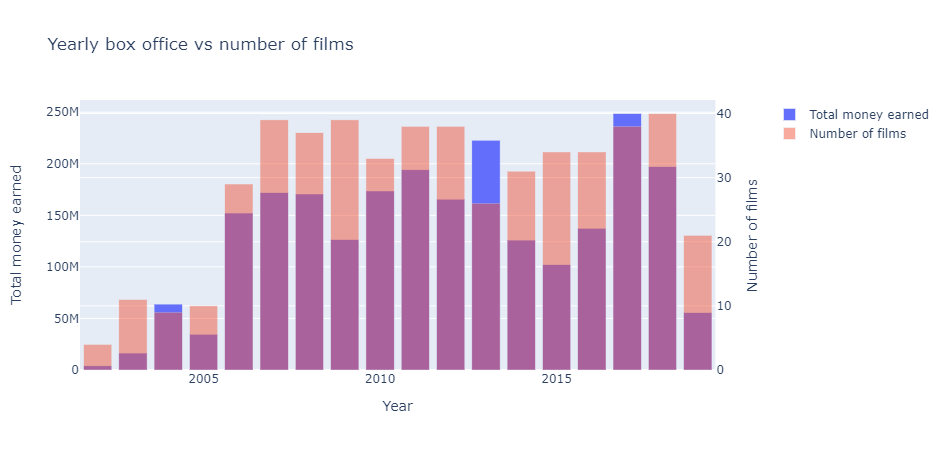

In [58]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=box_office_vs_films_per_year.year, y=box_office_vs_films_per_year['world_box_office_$'], name="Total money earned"),
    secondary_y=False
)

fig.add_trace(
    go.Bar(x=box_office_vs_films_per_year.year, y=box_office_vs_films_per_year.imdb_title_id, name="Number of films", opacity=0.5),
    secondary_y=True
)

# Add figure title
fig.update_layout(
    title_text="Yearly box office vs number of films"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Total money earned", secondary_y=False)
fig.update_yaxes(title_text="Number of films", secondary_y=True)

fig.show()

2019 was the lowest earning and the lowest filming year in more than a decade. Data is from November, so it's pretty accurate for this particular assumption. 

But we are producers, remember? So let's go back to the interesting part - how do we increase our chances of profiting? First things first - who do we hire as a director? Let's take a look at highest earning and highest voted directors.

In [59]:
directors = russian_movies.pivot_table(index='director', values=['avg_vote', 'world_box_office_$'], aggfunc='mean')
directors

,avg_vote,world_box_office_$
director,,
Aleksandr Andryushchenko,4.600000,2480679.00
Aleksandr Aravin,5.400000,88242.00
Aleksandr Atanesyan,5.433333,4597214.00
"Aleksandr Baranov, Levan Gabriadze",6.300000,28050910.00
Aleksandr Barshak,5.200000,2734291.00
...,...,...
Yuri Mamin,6.700000,22095.00
"Yuriy Batanin, Yuri Kulakov",6.900000,5399826.00
Yuriy Bykov,6.933333,57799.00


In [60]:
directors_by_vote = directors.sort_values('avg_vote', ascending=False).head(10)
directors_by_vote

,avg_vote,world_box_office_$
director,,
Sergey Loban,7.700,696511.0
Andrey Zvyagintsev,7.625,3947870.0
Vyacheslav Ross,7.600,115240.0
Vladimir Mashkov,7.600,673844.0
"Aleksandr Kasatkin, Natalya Nazarova",7.400,34440.0
Dmitriy Kiselev,7.300,9677311.0
Vladimir Nikolaev,7.300,3146489.0
Aleksandr Khant,7.200,112071.0
Konstantin Bronzit,7.100,1732414.0


In [61]:
directors_by_box_office = directors.sort_values('world_box_office_$', ascending=False).head(10).astype(int)
directors_by_box_office

,avg_vote,world_box_office_$
director,,
Timur Bekmambetov,5,49631308
"Levan Gabriadze, Aleksandr Karpilovskiy",5,40267368
Oleg Trofim,6,29806210
Fedor Bondarchuk,5,29523898
"Aleksandr Baranov, Levan Gabriadze",6,28050910
Ilya Kulikov,6,27046055
Anton Megerdichev,5,26275202
Nikolay Lebedev,6,25434358
"Timur Bekmambetov, Yaroslav Chevazhevskiy",6,25030264


Sadly, no intersections. More so - if we'd take a director by votes, we'd lose from 2.5 to hundreds of times in earnings on average. So we'll leave an art to others and go with one of the earners - Bekmambetov would be our number one candidate. He's also famous for being the only one of our 'blockbuster makers' working even in Hollywood.

Okey, but who do we trust with our script? Let's do the same research for writers.

In [62]:
split_writers = russian_movies.writer.dropna().str.split(",")
data = split_writers.to_list()
names = ["Writer1", "Writer2"]
data_for_writers = pd.DataFrame(data, columns=names)
data_for_writers

,Writer1,Writer2
0,Aleksandr Rogozhkin,None
1,Leonid Filatov,None
2,Aleksey Balabanov,None
3,Daniil Koretskiy,Fuad Ibragimbekov
4,Irina Grekova,Vladimir Valutskiy
...,...,...
485,Ilya Kulikov,None
486,Aleksey Kozlov,None
487,Leonid Barats,None
488,Aleksei Ivanov,Aleksey Permyakov


In [63]:
#We split 'writer' column and make a new df with selected columns
russian_movies.dropna(subset=['writer'], inplace=True)
russian_movies[['writer1','writer2']] = russian_movies.writer.str.split(",", expand=True)
two_writers_russian_movies = russian_movies[['title', 'genre', 'duration', 'avg_vote', 'world_box_office_$', 'writer1', 'writer2']]
two_writers_russian_movies

,title,genre,duration,avg_vote,world_box_office_$,writer1,writer2
40229,Kukushka,"Drama, War, Comedy",99,7.8,480578,Aleksandr Rogozhkin,None
40248,Skaz pro Fedota-streltsa,"Comedy, Fantasy",102,5.4,2637198,Leonid Filatov,None
40251,Voyna,"Action, Drama, War",120,7.7,1887,Aleksey Balabanov,None
40871,[Anti]killer,"Action, Crime",114,5.6,875688,Daniil Koretskiy,Fuad Ibragimbekov
41673,Blagoslovite zhenshchinu,Drama,114,6.6,604071,Irina Grekova,Vladimir Valutskiy
...,...,...,...,...,...,...,...
81117,Politseyskiy s Rublyovki. Novogodniy bespredel,Comedy,95,6.1,27046055,Ilya Kulikov,None
81161,Spasti Leningrad,"Action, Drama, War",96,6.8,3068838,Aleksey Kozlov,None
81170,Gromkaya svyaz,Comedy,96,6.6,8864882,Leonid Barats,None
81232,Tobol,"Action, Drama, History",108,5.0,2178525,Aleksei Ivanov,Aleksey Permyakov


In [64]:
#Now from that df we only take data for the first and then second writers and rename those columns to match for the merge
writer1 = two_writers_russian_movies.groupby(['title', 'writer1'])[['avg_vote', 'world_box_office_$']].mean().reset_index()
writer1.rename(columns = {'writer1' : 'writer'}, inplace = True)
writer1

,title,writer,avg_vote,world_box_office_$
0,#Selfi,Sergey Minaev,5.1,4160740
1,(M)uchenik,Kirill Serebrennikov,6.9,318123
2,12,Nikita Mikhalkov,7.7,7537453
3,12 mesyatsev,Aleksandr Barshak,4.2,547009
4,14+,Andrey Zaytsev,7.0,167439
...,...,...,...,...
484,Zhivoy,Igor Porublyov,6.4,3216061
485,Zhizn vperedi,Zhora Kryzhovnikov,5.4,1889263
486,Zhmurki,Stas Mokhnachev,7.2,4180000
487,Zvezda,Anna Melikyan,7.0,52044


In [65]:
writer2 = two_writers_russian_movies.groupby(['title', 'writer2'])[['avg_vote', 'world_box_office_$']].mean().reset_index()
writer2.rename(columns = {'writer2' : 'writer'}, inplace = True)
writer2

,title,writer,avg_vote,world_box_office_$
0,(M)uchenik,Marius von Mayenburg,6.9,318123
1,12,Aleksandr Novototskiy-Vlasov,7.7,7537453
2,12 mesyatsev,Maxim Boev,4.2,547009
3,20 sigaret,Dmitriy Sobolev,5.5,1162816
4,22 minuty,Igor Porublyov,5.4,452036
...,...,...,...,...
302,Zhestokost,Denis Rodimin,5.9,111544
303,Zhivoy,Aleksandr Veledinskiy,6.4,3216061
304,Zhmurki,Aleksey Balabanov,7.2,4180000
305,Zvezda,Andrey Migachev,7.0,52044


In [66]:
#We outer merge frames to keep all writers and group by them
all_writers = pd.merge(writer1, writer2, how='outer', on='writer')
all_writers = all_writers.drop(columns = ['title_x', 'title_y'])
all_writers

,writer,avg_vote_x,world_box_office_$_x,avg_vote_y,world_box_office_$_y
0,Sergey Minaev,5.10,4160740.0,NaN,NaN
1,Sergey Minaev,6.40,14040817.0,NaN,NaN
2,Kirill Serebrennikov,6.90,318123.0,NaN,NaN
3,Nikita Mikhalkov,7.70,7537453.0,NaN,NaN
4,Nikita Mikhalkov,4.15,4946281.0,NaN,NaN
...,...,...,...,...,...
791,Anna Rudnitskaya,NaN,NaN,6.2,1169771.0
792,Konstantin Murzenko,NaN,NaN,5.2,1758962.0
793,Aleksandr Veledinskiy,NaN,NaN,6.4,3216061.0
794,Aleksey Balabanov,NaN,NaN,7.2,4180000.0


In [67]:
grouped_writers = all_writers.groupby('writer').mean().reset_index()
grouped_writers

,writer,avg_vote_x,world_box_office_$_x,avg_vote_y,world_box_office_$_y
0,Aist Sergeyev,NaN,NaN,6.7,563554.0
1,Aleksandr Baldin,NaN,NaN,3.4,4262900.0
2,Aleksandr Boyarskiy,NaN,NaN,6.8,696126.0
3,Aleksandr Chervonenko,NaN,NaN,4.2,773713.0
4,Aleksandr Demidov,NaN,NaN,6.5,19225735.0
...,...,...,...,...,...
559,Yuriy Perov,3.6,2157711.0,NaN,NaN
560,Yusup Bakhshiev,5.2,1758962.0,NaN,NaN
561,Yusup Razykov,5.6,3667629.0,NaN,NaN
562,Zhora Kryzhovnikov,5.4,1889263.0,NaN,NaN


In [68]:
#We sort to look for highest earners and highest voted authors
writers_by_vote_x = grouped_writers.nlargest(10, 'avg_vote_x')
writers_by_vote_x

,writer,avg_vote_x,world_box_office_$_x,avg_vote_y,world_box_office_$_y
537,Vladimir Moiseenko,8.00,8482993.0,NaN,NaN
428,Marina Potapova,7.70,696511.0,NaN,NaN
253,Aleksandr Galich,7.60,673844.0,NaN,NaN
541,Vyacheslav Ross,7.60,115240.0,NaN,NaN
543,William Saroyan,7.60,641101.0,NaN,NaN
295,Andrei Romanov,7.50,1983666.0,NaN,NaN
454,Oleg Negin,7.45,3333693.0,NaN,NaN
346,Dmitriy Konstantinov,7.40,814790.0,NaN,NaN
474,Robert Lence,7.30,3146489.0,NaN,NaN
269,Aleksey Borodachyov,7.20,112071.0,NaN,NaN


In [69]:
writers_by_vote_y = grouped_writers.nlargest(10, 'avg_vote_y')
writers_by_vote_y

,writer,avg_vote_x,world_box_office_$_x,avg_vote_y,world_box_office_$_y
9,Aleksandr Novototskiy-Vlasov,NaN,NaN,7.85,8010223.0
59,Artyom Melkumyan,NaN,NaN,7.60,641101.0
219,Vladimir Mashkov,NaN,NaN,7.60,673844.0
189,Sergey Petreykov,NaN,NaN,7.55,9486932.0
155,Nikolay Lebedev,NaN,NaN,7.50,29295378.0
51,Andrey Zvyagintsev,NaN,NaN,7.45,3333693.0
41,Alyona Zvantsova,NaN,NaN,7.40,814790.0
173,Rauf Kubayev,NaN,NaN,7.40,4459303.0
214,Viktor Shamirov,NaN,NaN,7.30,83896.0
21,Aleksey Balabanov,NaN,NaN,7.20,4180000.0


In [70]:
writers_by_money_x = grouped_writers.nlargest(10, 'world_box_office_$_x')
writers_by_money_x

,writer,avg_vote_x,world_box_office_$_x,avg_vote_y,world_box_office_$_y
521,Vasiliy Grossman,5.60,68129518.00,NaN,NaN
490,Sergey Belov,6.60,59884129.00,NaN,NaN
506,Timur Bekmambetov,6.05,43481047.25,NaN,NaN
563,Zoya Kudrya,6.80,39143985.00,NaN,NaN
457,Olga Kharina,5.90,34159139.00,NaN,NaN
446,Nikita Vysotskiy,6.40,30468235.00,NaN,NaN
304,Andrey Kravchuk,4.50,29161298.00,NaN,NaN
284,Aleksey Zamyslov,6.30,24643054.00,NaN,NaN
485,Semyon Slepakov,4.70,24022125.00,NaN,NaN
356,Eduard Volodarskiy,5.10,23772559.00,NaN,NaN


In [71]:
writers_by_money_y = grouped_writers.nlargest(10, 'world_box_office_$_y')
writers_by_money_y

,writer,avg_vote_x,world_box_office_$_x,avg_vote_y,world_box_office_$_y
7,Aleksandr Konovalov,NaN,NaN,6.6,59884129.0
85,Emil Braginskiy,NaN,NaN,5.0,55639114.0
124,Laeta Kalogridis,NaN,NaN,6.4,50336279.0
187,Sergey Lukyanenko,NaN,NaN,6.5,42918532.0
192,Sergey Snezhkin,NaN,NaN,6.3,34633200.5
102,Igor Kharlamov,NaN,NaN,3.0,30525503.0
155,Nikolay Lebedev,NaN,NaN,7.5,29295378.0
111,Johan Melin,NaN,NaN,4.5,29161298.0
216,Vitaly Kozlov,NaN,NaN,5.8,26916103.0
17,Aleksandr Voytinskiy,NaN,NaN,6.3,25030264.0


by vote: Vladimir Moiseenko, Aleksandr Novototskiy-Vlasov, Marina Potapova

by earnings: Vasiliy Grossman, Aleksandr Konovalov, Sergey Belov

No intersections again, so we'll go with money-makers

Nice! Now let's pick some stars for our future film.

In [72]:
russian_movies['month_released'] = pd.DatetimeIndex(russian_movies['date_published']).month
russian_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget_$,usa_box_office_$,world_box_office_$,metascore,reviews_from_users,reviews_from_critics,writer1,writer2,month_released
40229,tt0308476,Kukushka,Kukushka,2002,2002-09-12,"Drama, War, Comedy",99,Russia,"Saami, Finnish, Russian, German",Aleksandr Rogozhkin,...,7045,$ 4000000,$ 243936,480578,69.0,58.0,43.0,Aleksandr Rogozhkin,None,9
40248,tt0308903,Skaz pro Fedota-streltsa,Skaz pro Fedota-streltsa,2002,2002-01-18,"Comedy, Fantasy",102,Russia,Russian,Sergei Ovcharov,...,194,$ 2500000,NaN,2637198,NaN,1.0,NaN,Leonid Filatov,None,1
40251,tt0309047,Voyna,Voyna,2002,2002-03-14,"Action, Drama, War",120,Russia,"Russian, English, Chechen",Aleksey Balabanov,...,3626,NaN,NaN,1887,NaN,29.0,10.0,Aleksey Balabanov,None,3
40871,tt0325005,[Anti]killer,[Anti]killer,2002,2002-08-01,"Action, Crime",114,Russia,"Russian, Spanish",Egor Konchalovskiy,...,1449,$ 1500000,NaN,875688,NaN,10.0,1.0,Daniil Koretskiy,Fuad Ibragimbekov,8
41673,tt0347334,Blagoslovite zhenshchinu,Blagoslovite zhenshchinu,2003,2003-09-04,Drama,114,Russia,"Russian, German",Stanislav Govorukhin,...,321,NaN,NaN,604071,NaN,NaN,1.0,Irina Grekova,Vladimir Valutskiy,9


In [73]:
russian_movies.groupby('month_released')['world_box_office_$'].mean().astype(np.int64)

month_released
1      7093888
2      5998511
3      3468492
4      4114174
5      1838127
6      1124122
7      1028433
8      2322117
9      2207040
10     6142994
11     2059539
12    13219622
Name: world_box_office_$, dtype: int64

Here we see, that the most earning months on average are december, january and october. Most surprising being the october - december and january make most of the money from Christmas and during holidays. Let's actually check if that is true.

In [74]:
russian_movies['day_released'] = pd.DatetimeIndex(russian_movies['date_published']).day
russian_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,budget_$,usa_box_office_$,world_box_office_$,metascore,reviews_from_users,reviews_from_critics,writer1,writer2,month_released,day_released
40229,tt0308476,Kukushka,Kukushka,2002,2002-09-12,"Drama, War, Comedy",99,Russia,"Saami, Finnish, Russian, German",Aleksandr Rogozhkin,...,$ 4000000,$ 243936,480578,69.0,58.0,43.0,Aleksandr Rogozhkin,None,9,12
40248,tt0308903,Skaz pro Fedota-streltsa,Skaz pro Fedota-streltsa,2002,2002-01-18,"Comedy, Fantasy",102,Russia,Russian,Sergei Ovcharov,...,$ 2500000,NaN,2637198,NaN,1.0,NaN,Leonid Filatov,None,1,18
40251,tt0309047,Voyna,Voyna,2002,2002-03-14,"Action, Drama, War",120,Russia,"Russian, English, Chechen",Aleksey Balabanov,...,NaN,NaN,1887,NaN,29.0,10.0,Aleksey Balabanov,None,3,14
40871,tt0325005,[Anti]killer,[Anti]killer,2002,2002-08-01,"Action, Crime",114,Russia,"Russian, Spanish",Egor Konchalovskiy,...,$ 1500000,NaN,875688,NaN,10.0,1.0,Daniil Koretskiy,Fuad Ibragimbekov,8,1
41673,tt0347334,Blagoslovite zhenshchinu,Blagoslovite zhenshchinu,2003,2003-09-04,Drama,114,Russia,"Russian, German",Stanislav Govorukhin,...,NaN,NaN,604071,NaN,NaN,1.0,Irina Grekova,Vladimir Valutskiy,9,4


In [75]:
dec_days = russian_movies[russian_movies['month_released'] == 12].groupby('day_released')['world_box_office_$'].mean().astype(np.int64)
dec_days

day_released
1     30468235
3      2785404
4      2005302
5      3102608
6        64501
7        45964
9      2196691
10      364246
12     8862897
13      190631
15    28050910
16    25030264
18      844037
20    27046055
21    35687215
22    10946820
23    10451988
24    10903254
25    14255822
26    40267368
27    20668321
28    24602154
29    24744844
30    20157447
31    17276341
Name: world_box_office_$, dtype: int64

So, on average films released at the end of the december make more money, but we also see some outliers. Let's check what films were released on 1st, 15th and 16th of December.

In [76]:
dec_outliers = russian_movies[(russian_movies['month_released'] == 12) & (russian_movies['day_released'].isin([1, 15, 16]))]
dec_outliers

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,budget_$,usa_box_office_$,world_box_office_$,metascore,reviews_from_users,reviews_from_critics,writer1,writer2,month_released,day_released
59653,tt1782568,Yolki,Yolki,2010,2010-12-16,Comedy,90,Russia,Russian,"Timur Bekmambetov, Yaroslav Chevazhevskiy",...,NaN,NaN,25030264,NaN,1.0,6.0,Timur Bekmambetov,Aleksandr Voytinskiy,12,16
62377,tt2116974,"Vysotskiy. Spasibo, chto zhivoy","Vysotskiy. Spasibo, chto zhivoy",2011,2011-12-01,"Biography, Drama",128,Russia,Russian,Pyotr Buslov,...,$ 12000000,NaN,30468235,NaN,6.0,25.0,Nikita Vysotskiy,None,12,1
62433,tt2124096,Yolki 2,Yolki 2,2011,2011-12-15,Comedy,106,Russia,Russian,"Aleksandr Baranov, Levan Gabriadze",...,NaN,NaN,28050910,NaN,2.0,2.0,Olga Kharina,Sakhar 1 kg,12,15


In [77]:
jan_days = russian_movies[russian_movies['month_released'] == 1].groupby('day_released')['world_box_office_$'].mean().astype(np.int64)
jan_days

day_released
1     13020824
2      2290903
7       197835
10     1028949
13      638726
17       15537
18      926783
19    10022576
20     2943620
21    13144882
22    15672437
24    16835996
25     2057163
26      696511
28        5553
Name: world_box_office_$, dtype: int64

As we can see here, there's actually no benefit in releasing on holidays, except 1st of January.

In [78]:
#Let's make a df with numeric variables per year
duration_per_year = russian_movies.groupby('year')['duration'].mean().reset_index()
avg_vote_per_year = russian_movies.groupby('year')['avg_vote'].mean().reset_index()
num_vars_per_year = box_office_vs_films_per_year.merge(duration_per_year, on='year', how='inner').merge(avg_vote_per_year, on='year', how='inner')
num_vars_per_year

,year,world_box_office_$,imdb_title_id,duration,avg_vote
0,2002,3995351,4,108.750000,6.625000
1,2003,16427258,11,99.909091,6.490909
2,2004,63861923,9,97.111111,5.744444
3,2005,34638045,10,113.900000,6.100000
4,2006,152194405,29,100.896552,5.748276
5,2007,171945840,39,103.947368,5.881579
6,2008,170651713,37,101.515152,5.845455
7,2009,126394544,39,97.081081,5.505405
8,2010,173586989,33,98.484848,5.472727
9,2011,194118279,38,102.105263,5.623684


In [127]:
num_vars_per_year.corr()

,year,world_box_office_$,imdb_title_id,duration,avg_vote
year,1.000000,0.519706,0.594123,-0.328196,-0.812837
world_box_office_$,0.519706,1.000000,0.827188,-0.434499,-0.621575
imdb_title_id,0.594123,0.827188,1.000000,-0.532048,-0.648571
duration,-0.328196,-0.434499,-0.532048,1.000000,0.420477
avg_vote,-0.812837,-0.621575,-0.648571,0.420477,1.000000


Interesting negative correlation between avgerage vote and a box office - the higher the vote, the lower the box office. Films that are made to be popular and earn money usually don't have a significant art-value and their average votes get lower between films being bad and a sheer amount of people that watched the film, didn't like it and voted low.

Also we should not forget that these are valid in the scope of years - on individual films level there are no significant correlations. That's mostly gonna be interesting to studio owners, not the producers.

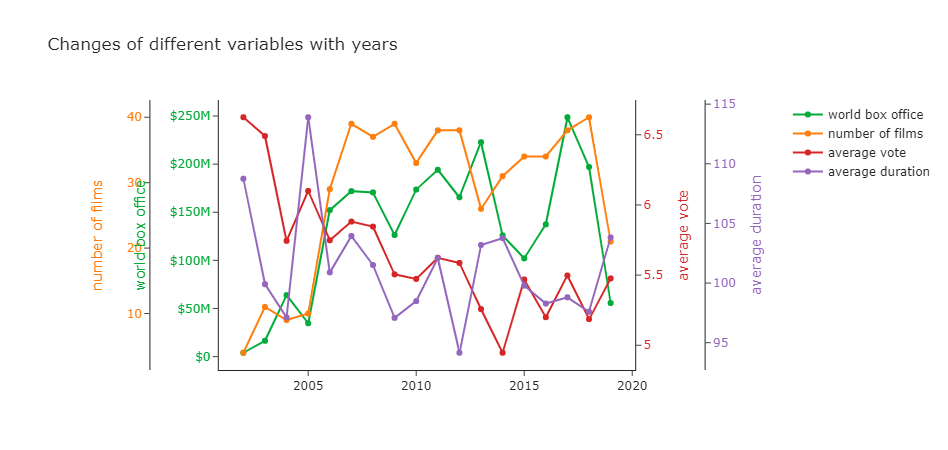

In [79]:
#Let's now plot numeric changes
fig=go.Figure()
fig.add_trace(go.Scatter(x=num_vars_per_year.year, y=num_vars_per_year['world_box_office_$'],
                        name='world box office', 
                        line_color='#03ab39')
             )
fig.add_trace(go.Scatter(x=num_vars_per_year.year, y=num_vars_per_year['imdb_title_id'],
                        name='number of films',
                        yaxis='y2',
                        line_color='#ff7f0e')
             )
fig.add_trace(go.Scatter(x=num_vars_per_year.year, y=num_vars_per_year['avg_vote'],
                        name='average vote',
                        yaxis='y3',
                        line_color='#d62728')
             )
fig.add_trace(go.Scatter(x=num_vars_per_year.year, y=num_vars_per_year['duration'],
                        name='average duration',
                        yaxis='y4',
                        line_color='#9467bd')
             )

#Setting up axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.2, 0.8]
    ),
    yaxis=dict(
        title="world box office",
        titlefont=dict(
            color="#03ab39"
        ),
        tickfont=dict(
            color="#03ab39",
        ),
        tickprefix='$'
    ),
    yaxis2=dict(
        title="number of films",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0.1
    ),
    yaxis3=dict(
        title="average vote",
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    yaxis4=dict(
        title="average duration",
        titlefont=dict(
            color="#9467bd"
        ),
        tickfont=dict(
            color="#9467bd"
        ),
        anchor="free",
        overlaying="y",
        side="right",
        position=0.9
    )
)

# Update layout properties
fig.update_layout(
    template='simple_white',
    title_text="Changes of different variables with years"
)

fig.show()

Let's take a closer look at some trends we see here

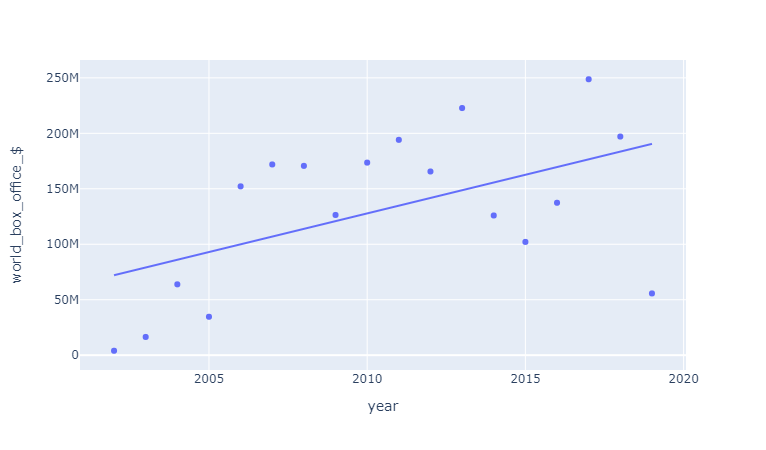

In [122]:
fig = px.scatter(num_vars_per_year, x="year", y="world_box_office_$", trendline="ols")
fig.show()

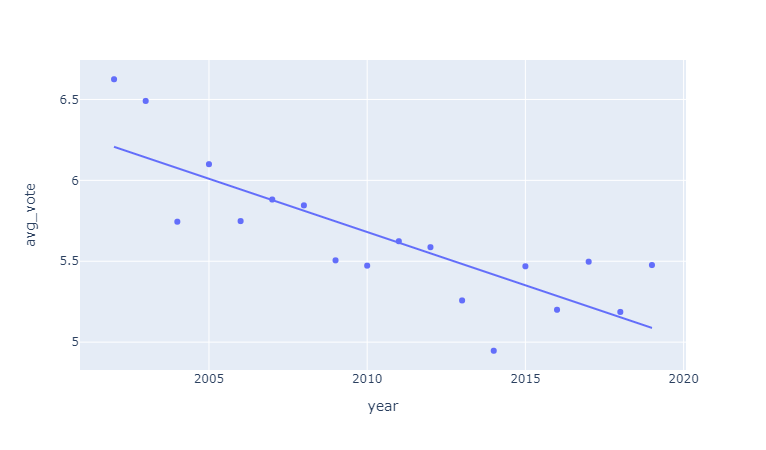

In [124]:
fig = px.scatter(num_vars_per_year, x="year", y="avg_vote", trendline="ols")
fig.show()

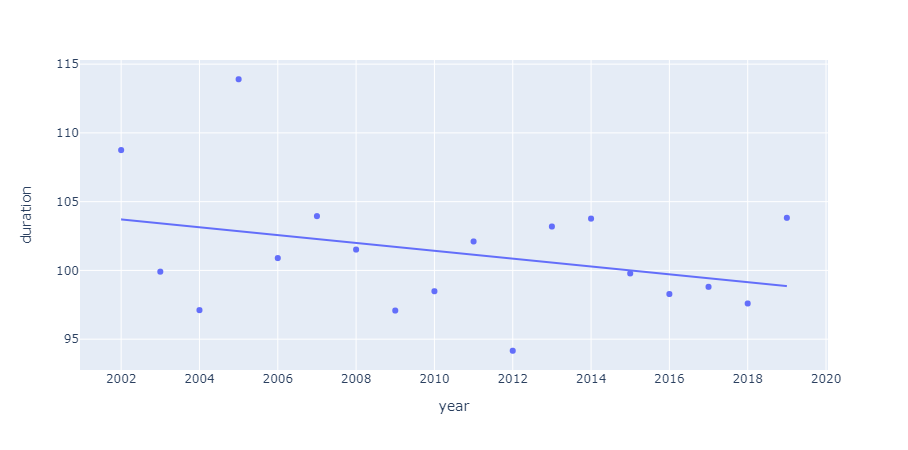

In [125]:
fig = px.scatter(num_vars_per_year, x="year", y="duration", trendline="ols")
fig.show()

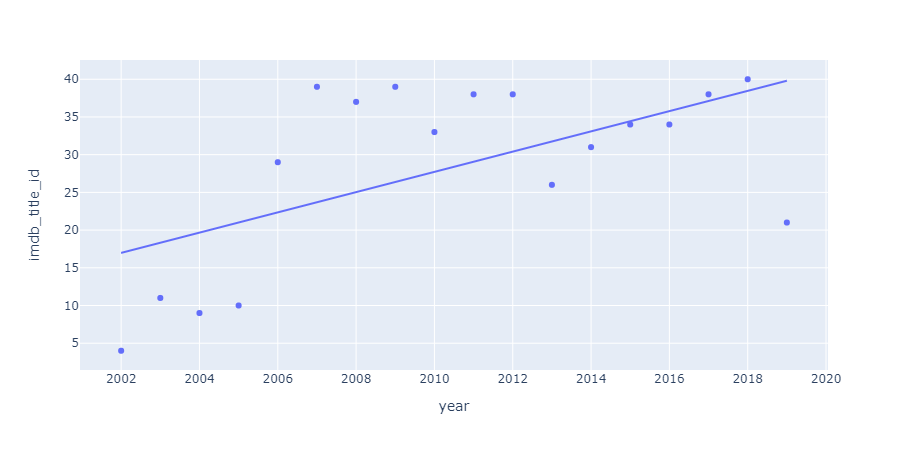

In [126]:
fig = px.scatter(num_vars_per_year, x="year", y="imdb_title_id", trendline="ols")
fig.show()

So we gradually make more films, earn more money, films get shorter and worse.

In [120]:
figs = cf.figures(num_vars_per_year, 
                    [dict (kind='scatter', mode='markers', x='year', y='world_box_office_$', size=5),
                    dict (kind='scatter', mode='markers', x='year', y='imdb_title_id', size=5),
                    dict (kind='scatter', mode='markers', x='year', y='duration', size=5),
                    dict (kind='scatter', mode='markers', x='year', y='avg_vote', size=5)], asList=True)
base_layout=cf.tools.get_base_layout(figs)
sp = cf.subplots(figs,shape=(2,2),base_layout=base_layout,vertical_spacing=.15,horizontal_spacing=.03,
               subplot_titles=['Histogram','Scatter 1','Scatter 2','Bestfit Line'])
sp['layout'].update(showlegend=False)

AttributeError: 'dict' object has no attribute 'iplot'

Some data from Hollywood

In [81]:
box_office_vs_films_per_year[box_office_vs_films_per_year['year'] >= 2006]['world_box_office_$'].mean()

160299383.14285713

We look at data starting from 2006 here because before that russian films made almost no money.

In [82]:
usa_movies = df[(df.country == 'USA') & (df.year >= 2000)]
usa_movies.dropna(subset=['worlwide_gross_income'], inplace=True)
myfunctions.clear_dollars(usa_movies, ['worlwide_gross_income'])
usa_movies.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,duration,avg_vote,votes,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,3510.000000,4383.000000,4370.000000
mean,2009.971812,100.130939,5.872039,52310.488520,55740365.117527,50.645299,181.918777,104.219680
std,5.448851,15.719710,1.082697,116111.562249,162889526.041100,16.956950,366.273880,119.891525
min,2000.000000,48.000000,1.100000,100.000000,30.000000,1.000000,1.000000,1.000000
25%,2006.000000,90.000000,5.300000,1460.500000,58199.000000,38.000000,22.000000,20.000000
50%,2010.000000,97.000000,6.000000,8433.000000,1194961.000000,50.000000,65.000000,58.000000
75%,2015.000000,107.000000,6.600000,46543.500000,38366593.000000,63.000000,186.000000,151.000000
max,2019.000000,398.000000,8.800000,1249336.000000,2797800564.000000,100.000000,8302.000000,883.000000


On average, one Hollywood film makes about 30% of all money made by russian films for the whole year.

Let's take a look what film did manage to get a 100 on metacritic.

In [83]:
top_meta = usa_movies[usa_movies.metascore == 100]
top_meta

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
51644,tt1065073,Boyhood,Boyhood,2014,2014-07-11,Drama,165,USA,"English, Spanish",Richard Linklater,...,"Ellar Coltrane, Patricia Arquette, Elijah Smit...","The life of Mason, from early childhood to his...",7.9,320400,$ 4000000,$ 25352281,44495281,100.0,949.0,576.0


Rotten Tomatoes also shows 99% for this film.

So we figured out what we need to do to increase our chances of returning profit from making a film in Russia:
- get Bekmambetov as a director
- get Grossman as a screenwriter
- genre here
- actors here